# Part I: Working with Time Series Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### A

I picked Apple Inc. Its ticker symbol is "AAPL".

### C

In [2]:
apple = pd.read_csv("AAPL.csv", index_col= 'Date', parse_dates=True)
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-05,147.770004,150.919998,145.770004,146.630005,145.814972,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.115646,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.156601,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,141.857086,62128300
2022-12-09,142.339996,145.570007,140.899994,142.160004,141.369827,76097000


In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-12-05 to 2023-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


### D

*We know this da|taframe is indexed by the time values from info() function. 'DatetimeIndex' is written in the information.*

### E

In [4]:
apple.index #index attributes

DatetimeIndex(['2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-12', '2022-12-13', '2022-12-14',
               '2022-12-15', '2022-12-16',
               ...
               '2023-11-17', '2023-11-20', '2023-11-21', '2023-11-22',
               '2023-11-24', '2023-11-27', '2023-11-28', '2023-11-29',
               '2023-11-30', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [5]:
# a. min and max of index attribute
print("Min: ", apple.index.max())
print("Max: ",apple.index.min())

Min:  2023-12-01 00:00:00
Max:  2022-12-05 00:00:00


In [6]:
# b. argmax and argmin
print("Argmax: ", apple.index.argmax())
print("Argmin: ", apple.index.argmin())

Argmax:  249
Argmin:  0


*c)
Min value gives the earliest date in dataframe's index. The minimum date is "2022-12-05", this means the earliest record in the dataset is on from December 5, 2022. Also, Max value gives the latest date, here, the maximum date is "2023-12-01", indicating the most recent record in the dataset is from December 1, 2023.
argmax() returns the position of the maximum value in the DataFrame's index.
The result "249" suggests that the most recent date ("2023-12-01") is located at position 249 in the dataset. Also, argmin() gives the position of the minimum value in the DataFrame's index.
The result "0" indicates that the earliest date ("2022-12-05") is at the very beginning of the DataFrame.*

### F

<Axes: xlabel='Date'>

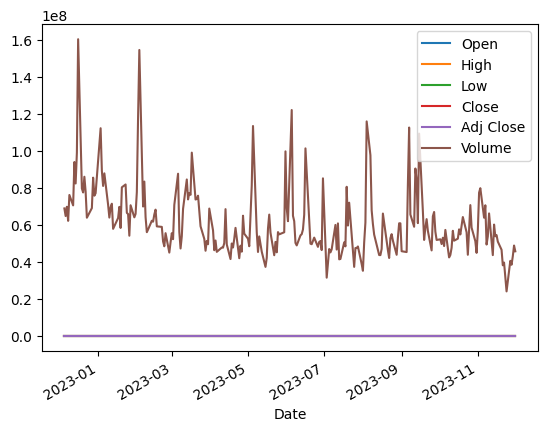

In [7]:
# a
apple.plot()


*i) I can only see the 2 variables(Adj Close, Volume) out of 6 variables in the plot. The y-axis ranges of each variable may be too different, so only two variables are shown in the plot. In the dataset, as we can see from head(), volume has much bigger values than other columns. To fix this problem, we can make multiple plots for each column so that their different values on the axis can be clearly shown on the plot, making the interpretation easier.*

<Axes: xlabel='Date'>

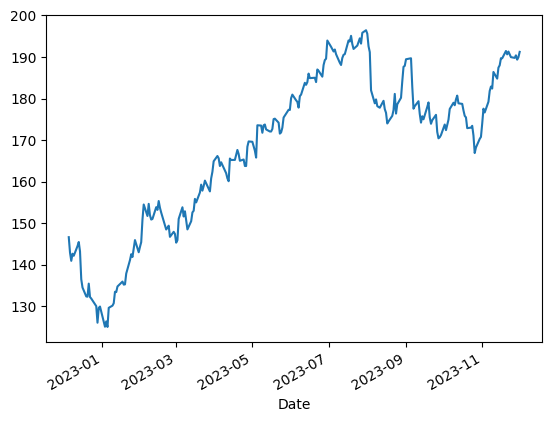

In [8]:
# b
apple['Close'].plot()

*i) This chart illustrates the closing prices of Apple stock over time, offering clearer interpretation due to the y-axis directly displaying stock values, in contrast to the prior graph's less intuitive le8 y-axis unit.*

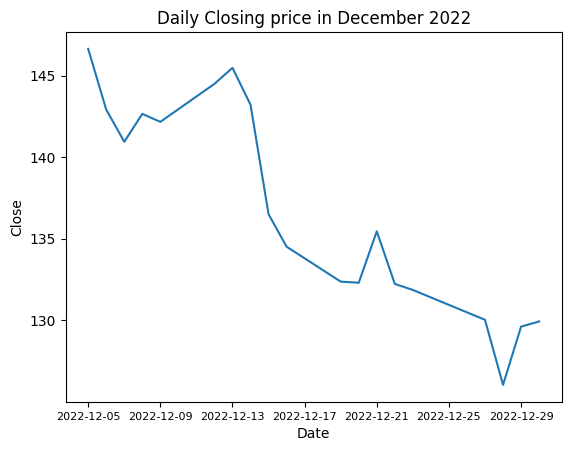

In [9]:
#c. i
apple.head()
start_date = '2022-12-01'
end_date = '2022-12-31'
one_month = apple.loc[start_date:end_date]
plt.plot(one_month['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Daily Closing price in December 2022')
plt.xticks(fontsize=8)
plt.show()

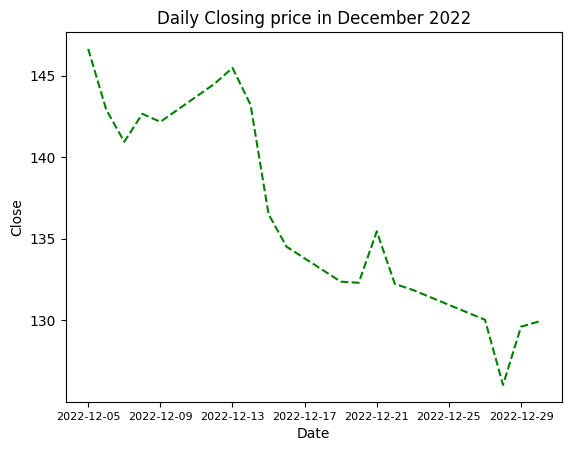

<Figure size 2000x800 with 0 Axes>

In [10]:
#c. ii
plt.plot(one_month['Close'], color = 'green', linestyle = 'dashed')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Daily Closing price in December 2022')
plt.xticks(fontsize=8)
plt.figure(figsize=(20, 8))
plt.show()

### G

<Axes: xlabel='Date'>

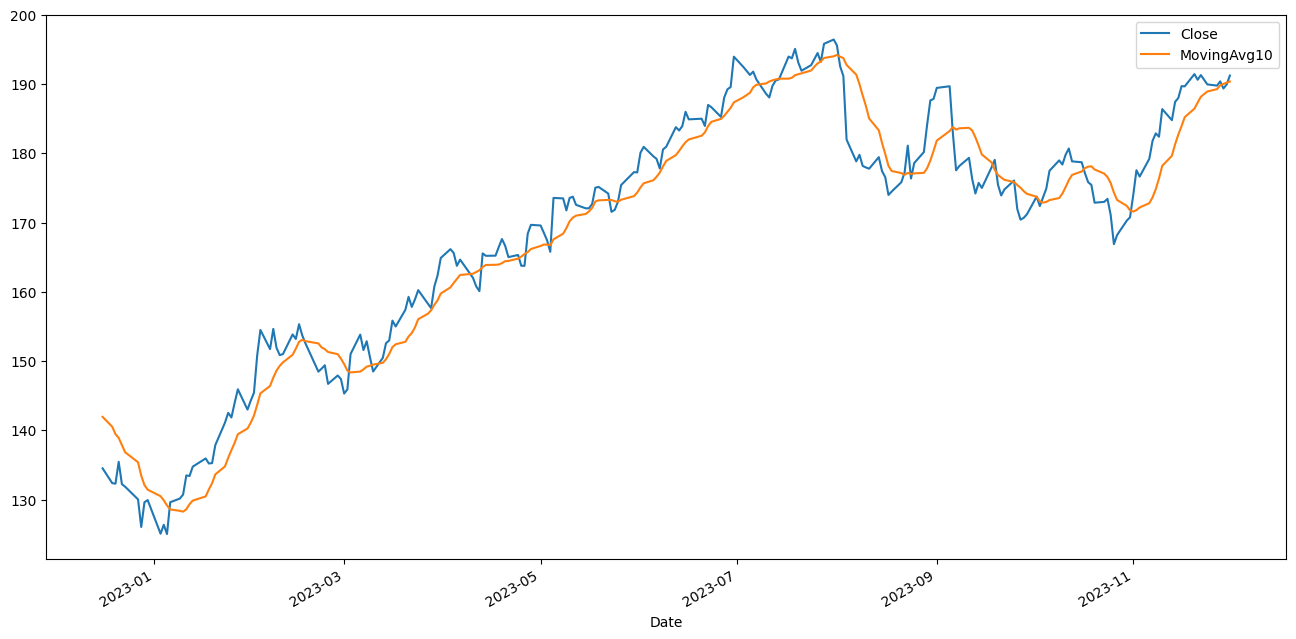

In [11]:
#G(a) Generate a 10-period moving average for your ‘Close’ variable,
#create a plot that overlays this 10-period average atop the actual daily closing prices.
apple2 = apple['Close'].to_frame()
apple2['MovingAvg10'] = apple2['Close'].rolling(10).mean() 
apple2.dropna(inplace=True)
apple2[['Close', 'MovingAvg10']].plot(label='10-Period Moving Average',figsize=(16, 8))

<Axes: xlabel='Date'>

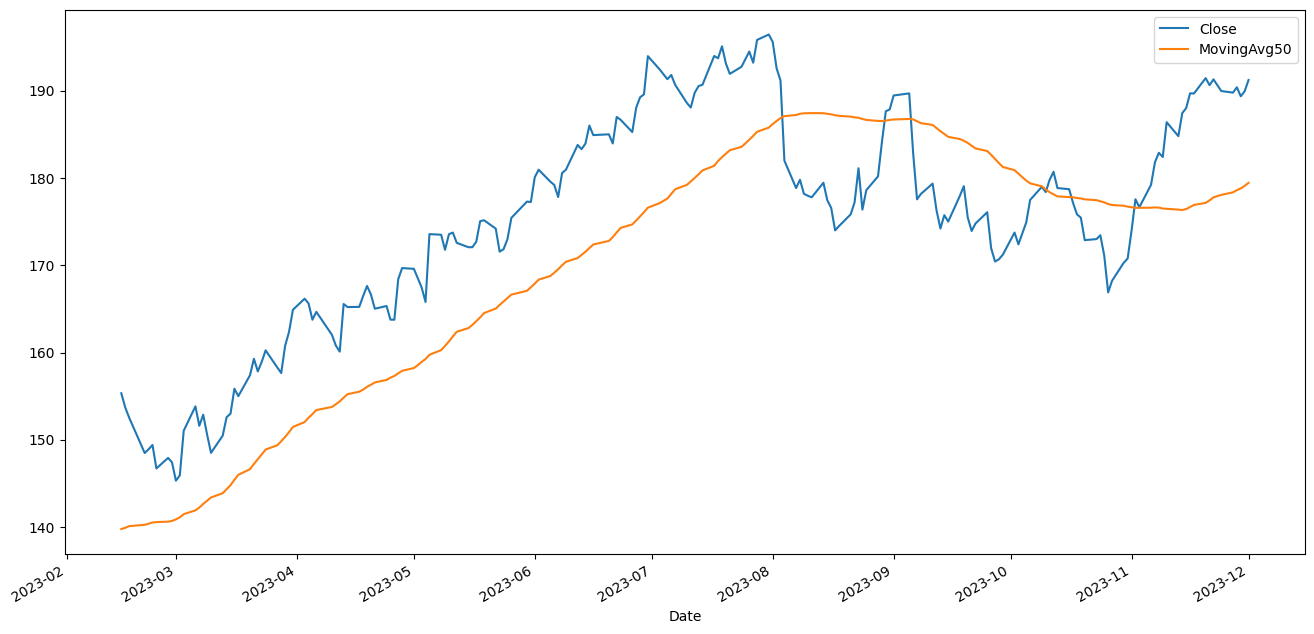

In [12]:
# G(b) generate a 50-period moving average for your ‘Close’ variable, and
#create a plot that overlays this 50-period average atop the actual daily closing prices.
apple3 = apple['Close'].to_frame()
apple3['MovingAvg50'] = apple3['Close'].rolling(50).mean() 
apple3.dropna(inplace=True)
apple3[['Close', 'MovingAvg50']].plot(label='50-Period Moving Average',figsize=(16, 8))

*The two moving average plots differ in their sensitivity to price changes. The 10-day moving average is more responsive, providing quicker signals for recent price trends, but it can lead to false positives due to its sensitivity to minor price fluctuations. On the other hand, the 50-day moving average smooths out short-term volatility, offering a clearer picture of the underlying trend but with a slower response time, which can delay trading signals. Short-moving averages are preferable for short-term trading strategies, while long-moving averages are better suited for identifying and confirming long-term trends.*

### H

In [13]:
# a
quarterly_mean_Close= apple['Close'].resample('Q').mean()
quarterly_mean_Close

Date
2022-12-31    136.804737
2023-03-31    147.551129
2023-06-30    174.250323
2023-09-30    183.384286
2023-12-31    180.395910
Freq: Q-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

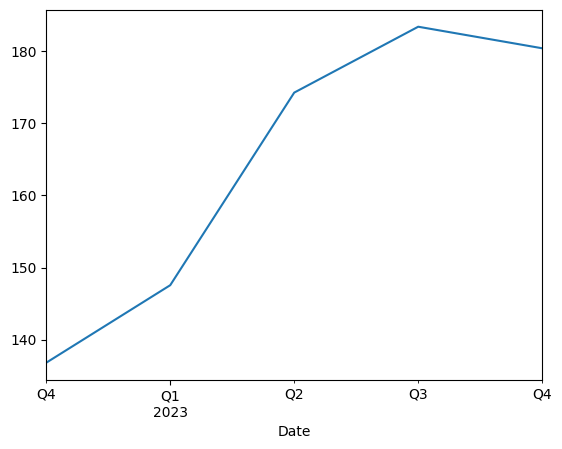

In [14]:
#a. i 
quarterly_mean_Close.plot()

*ii) A financial analyst might consider resampling a time series in market forecasting for better long-term prediction.
For instance, if the analyst has stock price data at hour intervals, this might be too noisy for understanding overall market trends. By resampling the data to a daily or weekly frequency, the analyst can smooth out short-term fluctuations and more precisely identify longer-term price trends. 
This resampling to a lower frequency can help make investment decisions based on the broader perspective of the market.*

# Part II: Marketing Mix Modeling with an Interaction Term

### I

In [15]:
ad = pd.read_csv("ad_data.csv")
ad.columns

Index(['YouTube', 'Spotify', 'Banners', 'Sales'], dtype='object')

In [16]:
# a
# create a new variable that shows the total spending
ad['total_spending'] = ad['YouTube'] + ad['Spotify'] + ad['Banners']


In [17]:
# b
# Correlation between total spending and Sales.
print("The correlation between total spending and Sales: ",ad['total_spending'].corr(ad['Sales']))

The correlation between total spending and Sales:  0.8677123027017424


*ii) The correlation between total spending and sales is 0.87, which can be considered a highly positive correlation. We can assume that when total spending goes up, sales also tend to be in an increasing trend, or vice versa. However, we should keep in mind that correlation isn't causation. Correlation only shows you the direction and magnitude of the relationship between two relationships, but it doesn't mean one variable can affect the other variable. Therefore, a positive correlation doesn't mean more total spending increases Sales.*

In [18]:
# c
#correlations among three variables.
ad[['YouTube', 'Spotify', 'Banners']].corr()

,YouTube,Spotify,Banners
YouTube,1.000000,0.054809,0.056648
Spotify,0.054809,1.000000,0.354104
Banners,0.056648,0.354104,1.000000


*i) The highest correlation among these variables is 0.35, which is considered as low value of correlation. Therefore, we can conclude that there is no multicollinearity problem that happens when there is a high correlation between variables.* 

In [19]:
# d
X = ad[['YouTube', 'Spotify', 'Banners']] #input variables
Y = ad['Sales'] #outcome
X = sm.add_constant(X) # include an intercept in the model.
model_1 = sm.OLS(Y, X).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        13:54:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

*i)
The p-value of the F-statistic for the model is 1.58e-96, which is very small. This rejects the null hypothesis that all regression coefficients are equal to zero, suggesting that independent variables in the model significant effect on the dependent variable 'Sales'. It means at least one of the predictors will be useful in predicting Sales.*

*ii. The p value for Youtube, Spotify is 0.000 but pvalue for Banners is 0.86. It means that Youtube and Spotify are statistically significant predictors, because when the pvalue is less than 0.05 (alpha value that is commonly used), it rejects the null hypothesis that the predictor have zero impact on the model. However, Banners isn't statistically significant because it cannot reject the null hypothesis.*

In [20]:
# e
ad['interaction_Y_S'] = ad['YouTube'] * ad['Spotify']
X = ad[['YouTube', 'Spotify','interaction_Y_S']]
Y = ad['Sales']
X = sm.add_constant(X)
model_2 = sm.OLS(Y, X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          6.68e-146
Time:                        14:11:18   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.7502      0.248     

*i)Each predictor exhibits p-values below 0.05, signifying their statistical significance in the model. Furthermore, the interaction predictor, combining YouTube and Spotify ad spending, is also significant, demonstrating a synergistic effect absent in the individual predictors' impacts.*

In [22]:
# ii
X = ad[['YouTube', 'Spotify']]
Y = ad['Sales']
X = sm.add_constant(X)
model_3 = sm.OLS(Y, X).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           4.83e-98
Time:                        14:29:33   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

*ii)*

*The R-squared value of the first model, which includes an interaction term, is 0.968. In contrast, the R-squared value for the second model, which does not include the interaction term, is lower at 0.897. This significant increase in R-squared from 0.897 to 0.968 upon adding the interaction term indicates that the interaction term greatly enhances the model's explanatory power. This enhancement goes beyond the individual impacts of YouTube and Spotify on Sales. It implies that YouTube's effect on Sales is affected by Spotify's level or the other way around.*

*iii)*

*Based on the coefficients from the regression model (which includes the interaction term), the prediction equation is this:*

Sales
= 6.7502 +
( 0.0191× YouTube)+ (0.0289×Spotify) + (0.0011×YouTube×Spotify)

Sales=6.7502+(0.0191×YouTube)+(0.0289×Spotify)+(0.0011×YouTube×Spotify)

*Plugging in the values for YouTube (150 units) and Spotify (30 units):*

Sales
 = 6.7502 + ( 0.0191 × 150 ) + ( 0.0289 × 30 ) + ( 0.0011 × 150 × 30) = 15.43

*The model predicts that a marketer using 150 units of YouTube spending and 30 units of Spotify ad spending should expect to see a sales outcome of approximately 15.43 units*

*iv)*

*Nowadays, YouTube and Spotify are popular among users, often found together on their phones. Consequently, encountering ads on both platforms potentially doubles their impact. This synergy in advertising likely contributes to increased sales when investing in both apps.*

*f.*

*i) In the scenario I designed, I examined the impact of temperature and humidity on human comfort. I developed a model where the combined effect of temperature and humidity, represented by the interaction term, has a negative coefficient. This means that an increase in either temperature or humidity reduces comfort levels. This concept is consistent with common experiences: extreme heat and high humidity are typically seen as oppressive because they hinder the body's cooling process through sweating. The negative interaction term in my model captures this, suggesting that discomfort intensifies when both temperature and humidity increase simultaneously.*

# Part III: Wildcard: Google Trends

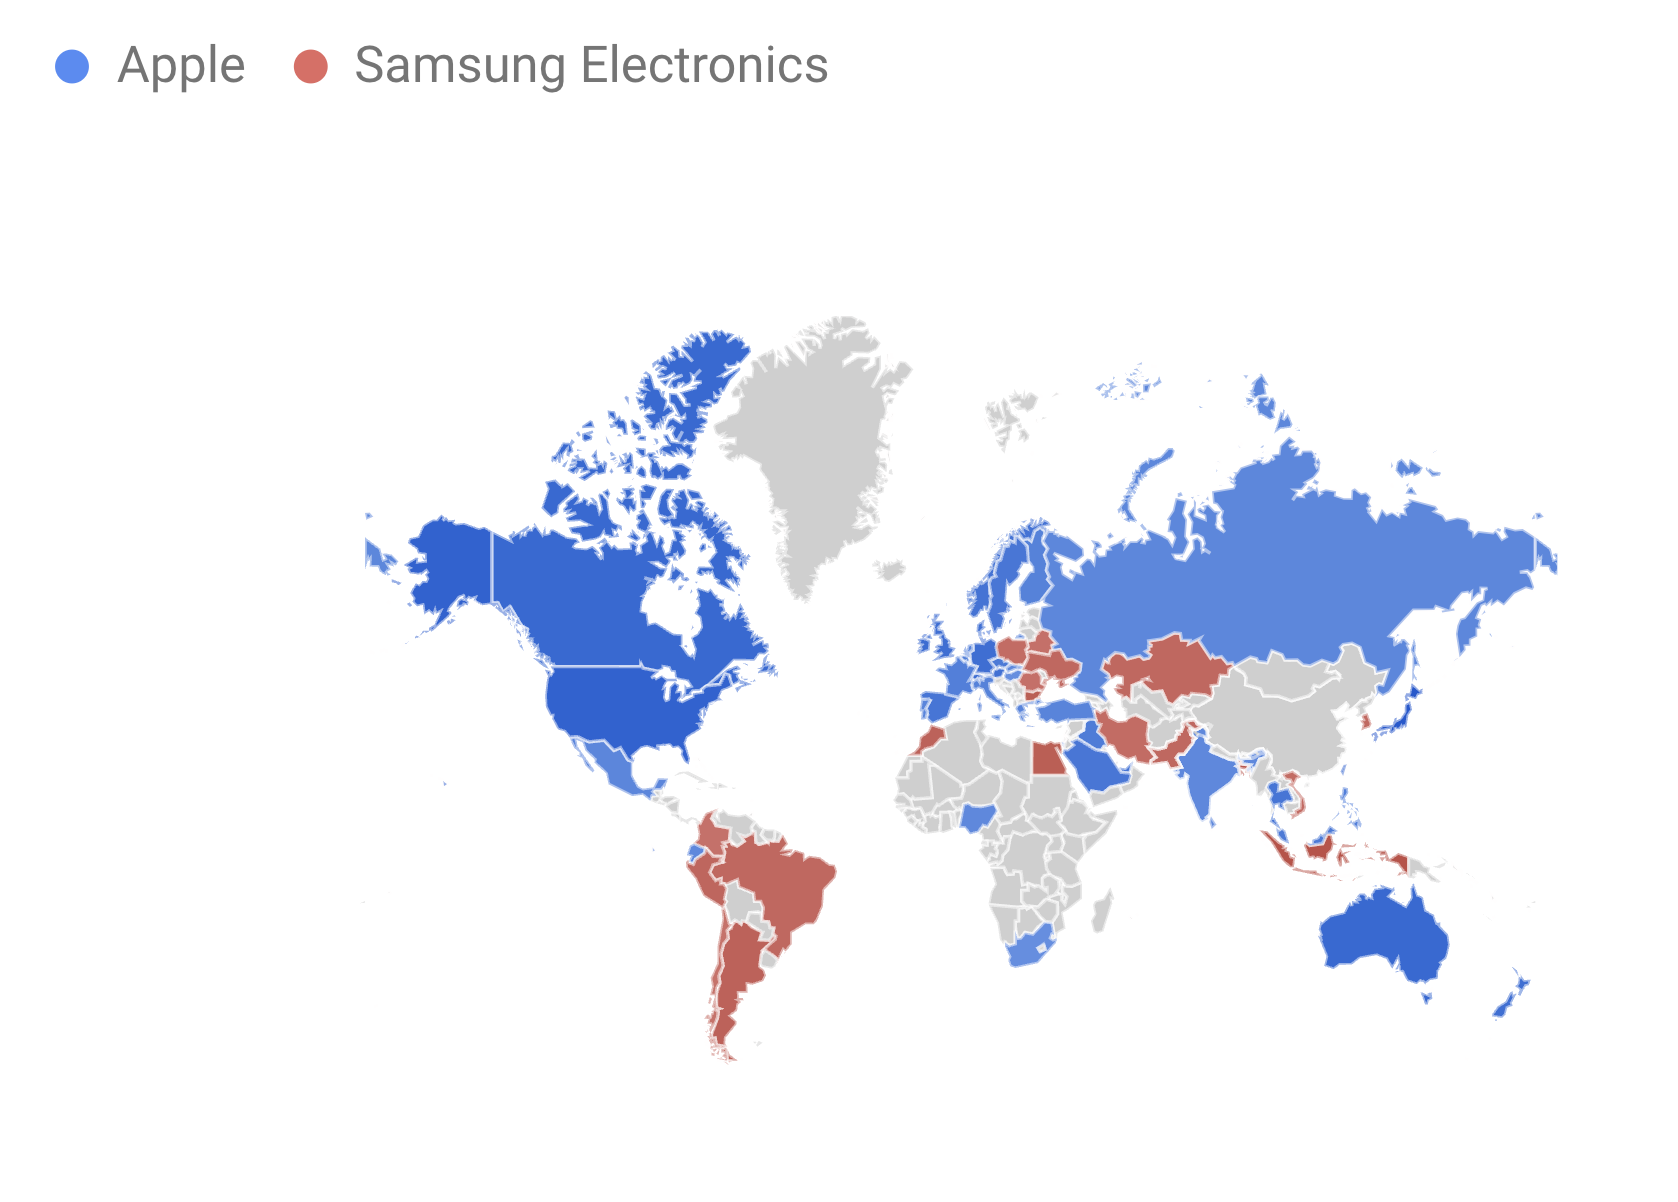

In [27]:
from IPython.display import Image

# Display the image by its file path
display(Image(filename='/Users/jiunlee/Documents/Fall_23/MarketingAnalytics/Assignment5/Screenshot 2023-12-03 at 6.00.53 PM.png'))

*Japan, the United States, Canada, Australia, and so on have a high interest in Apple, but Samsung, Indonesia, Bangladesh, Bulgaria, and so on have a high interest in Samsung. Asian countries seem to have a high interest in Samsung, but Western countries and Japan have a higher interest in Apple.*

*In terms of the related query for Samsung Electronics, "Samsung s23" refers to the Samsung Galaxy S23, which is a smartphone series from Samsung. 
The related query "Binance" and "BTC" in Apple's search trends likely pertain to the Binance app, which is a cryptocurrency exchange platform available on the Apple App Store. Binance is a cryptocurrency exchange platform where users can trade various cryptocurrencies, including Bitcoin (BTC). Also, Apple Pay can be used to purchase Bitcoin and other cryptocurrencies through the platform.*

*A marketer observing high search volumes for "Samsung s23" on Google Trends can use this data to time marketing campaigns when consumer interest is highest. This information can also guide regional marketing, identifying where interest in the product is strongest and customizing promotions for those regions, potentially improving sales for new tech products.
Likewise, a rise in searches for "Binance" and "BTC" in the Apple App Store may show increasing interest in cryptocurrencies, indicating opportunities for financial marketers to consider partnerships with trading platforms or payment services. 
By leveraging live data from Google Trends, marketers can refine their product development and targeted advertising strategies, ensuring they align with current consumer demands and interests.*